In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense


2023-04-20 20:41:34.547777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def generate_sine_wave(periods, steps_per_period, amplitude=1, phase=0):
    t = np.linspace(0, periods * 2 * np.pi, steps_per_period * periods, endpoint=False)
    return amplitude * np.sin(t + phase)

steps_per_period = 100
periods = 5
data = generate_sine_wave(periods, steps_per_period)


In [3]:
def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 50
X, y = prepare_data(data, window_size)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM input

In [4]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2023-04-20 20:41:36.214849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 20:41:36.216930: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.fit(X, y, epochs=200, verbose=1)


Epoch 1/200
15/15 [==============================] - 2s 49ms/step - loss: 0.3892
Epoch 2/200
15/15 [==============================] - 1s 40ms/step - loss: 0.1242
Epoch 3/200
15/15 [==============================] - 1s 48ms/step - loss: 0.0828
Epoch 4/200
15/15 [==============================] - 1s 50ms/step - loss: 0.0566
Epoch 5/200
15/15 [==============================] - 1s 60ms/step - loss: 0.0259
Epoch 6/200
15/15 [==============================] - 1s 73ms/step - loss: 0.0050
Epoch 7/200
15/15 [==============================] - 1s 79ms/step - loss: 0.0017
Epoch 8/200
15/15 [==============================] - 1s 60ms/step - loss: 0.0012
Epoch 9/200
15/15 [==============================] - 1s 64ms/step - loss: 0.0011
Epoch 10/200
15/15 [==============================] - 1s 52ms/step - loss: 9.7105e-04
Epoch 11/200
15/15 [==============================] - 1s 60ms/step - loss: 6.7809e-04
Epoch 12/200
15/15 [==============================] - 1s 84ms/step - loss: 5.4241e-04
Epoch 13/200


1/1 [==============================] - 0s 21ms/step


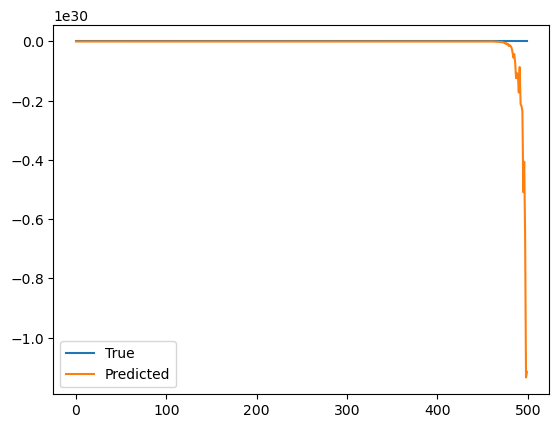

In [6]:
predictions = np.zeros_like(data)
predictions[:window_size] = data[:window_size]

for i in range(window_size, len(data)):
    x_input = predictions[i - window_size:i].reshape(1, window_size, 1)
    predictions[i] = model.predict(x_input)

plt.plot(data, label='True')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()